In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import FuncFormatter
import pickle
import seaborn as sns

In [121]:
#load data
figure_1_data = pd.read_pickle('figure_1_data.pkl')
womenMatched = figure_1_data[figure_1_data.Gender=='women']
menMatched = figure_1_data[figure_1_data.Gender=='men']

# women
# pubs mean 
prizewinner_pub  = womenMatched[womenMatched.Group_member=="prizewinner"].Yearly_pub_num.values
prizewinnerPubMF = np.nanmean(np.array(list(prizewinner_pub)), axis=0)

contender = womenMatched[womenMatched.Group_member=="contender"]  
stepM = contender.groupby("Group",as_index=False)["Yearly_pub_num"].apply(lambda x: np.nanmean(np.array(list(x.values)), axis=0))
contenderPubMF = np.nanmean(np.array(list(stepM)), axis=0)

# cits mean  
prizewinner_cit  = womenMatched[womenMatched.Group_member=="prizewinner"].Yearly_cit_num.values
prizewinnerCitMF = np.nanmean(np.array(list(prizewinner_cit)), axis=0) 

stepC = contender.groupby("Group",as_index=False)["Yearly_cit_num"].apply(lambda x: np.nanmean(np.array(list(x.values)), axis=0))
contenderCitMF = np.nanmean(np.array(list(stepC)), axis=0)

# men
# pubs mean  
prizewinner_pub  = menMatched[menMatched.Group_member=="prizewinner"].Yearly_pub_num.values
prizewinnerPubMM = np.nanmean(np.array(list(prizewinner_pub)), axis=0) 

contender = menMatched[menMatched.Group_member=="contender"]  
stepM = contender.groupby("Group",as_index=False)["Yearly_pub_num"].apply(lambda x: np.nanmean(np.array(list(x.values)), axis=0))
contenderPubMM = np.nanmean(np.array(list(stepM)), axis=0) 

# cits mean
prizewinner_cit  = menMatched[menMatched.Group_member=="prizewinner"].Yearly_cit_num.values
prizewinnerCitMM = np.nanmean(np.array(list(prizewinner_cit)), axis=0)

stepC = contender.groupby("Group",as_index=False)["Yearly_cit_num"].apply(lambda x: np.nanmean(np.array(list(x.values)), axis=0))
contenderCitMM = np.nanmean(np.array(list(stepC)), axis=0)    

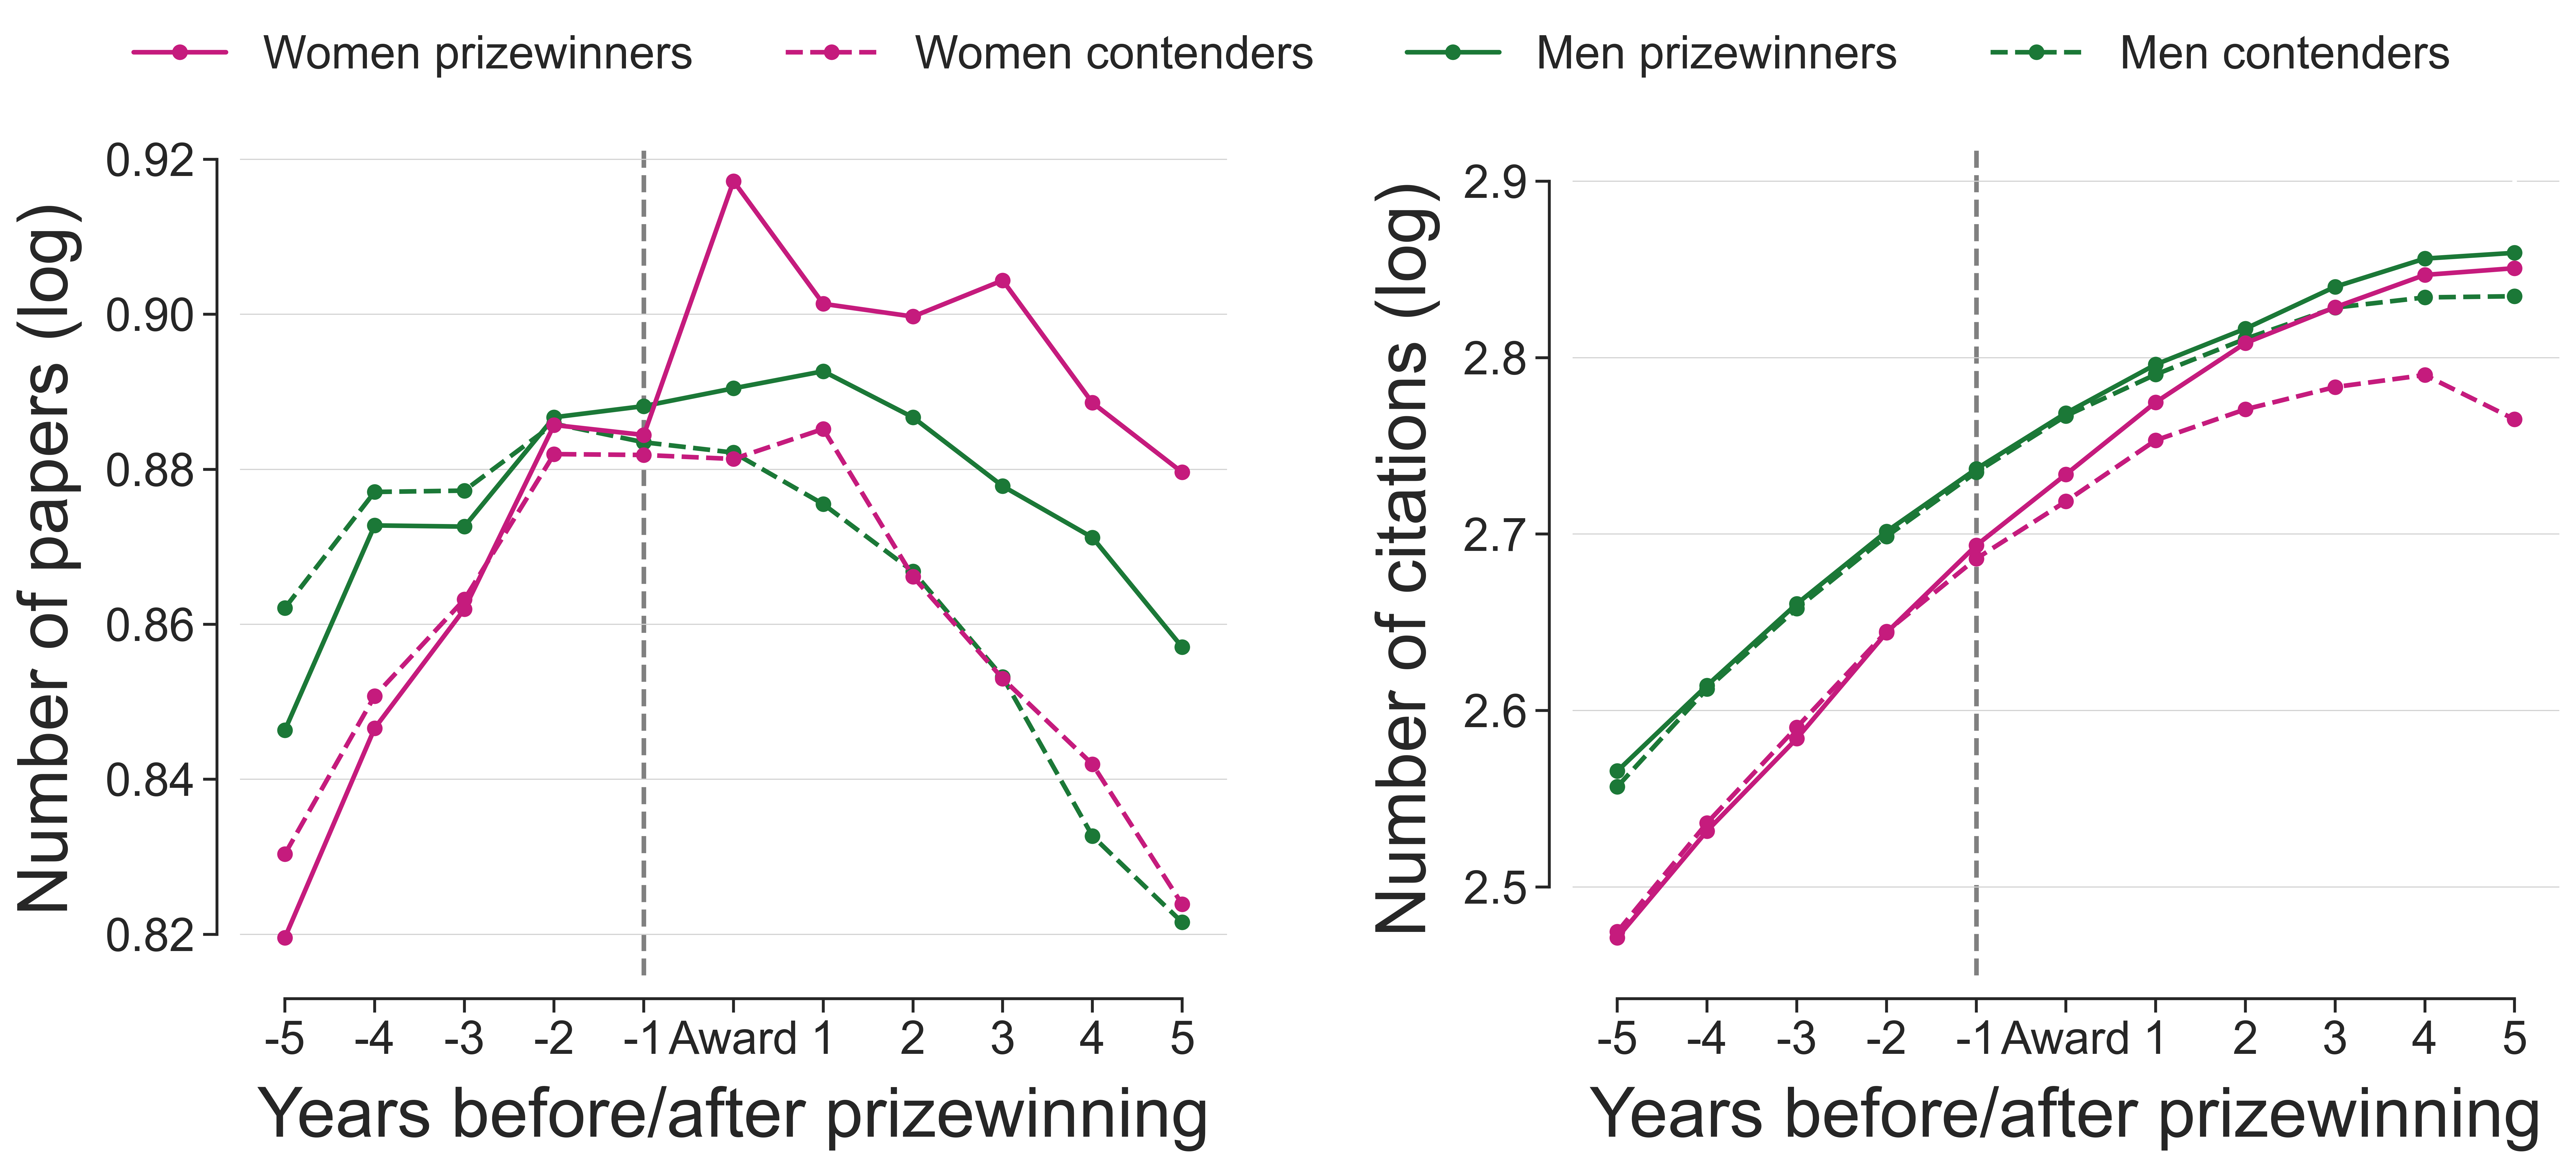

In [122]:
# draw the first figure 
def Figure_Match(prizewinnerMM, contenderMM, prizewinnerMF, contenderMF, ylabel, ax=None):

    pos = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
    
    data = pd.DataFrame({
        'Position': pos,
        'Men Contender': contenderMM,
        'Men Prizewinner': prizewinnerMM,
        'Women Contender': contenderMF,
        'Women Prizewinner': prizewinnerMF
    })

    sns.lineplot(data=data, x='Position', y='Men Contender', 
                 linestyle='--', linewidth=2, color="#1b7837", 
                 marker='o', markersize=6, markeredgecolor='#1b7837',  
                 markerfacecolor='#1b7837', label="Men contenders")

    sns.lineplot(data=data, x='Position', y='Men Prizewinner', 
                 linestyle='-', linewidth=2, color="#1b7837", 
                 marker='o', markersize=6, markeredgecolor='#1b7837',  
                 markerfacecolor='#1b7837', label="Men prizewinners")

    sns.lineplot(data=data, x='Position', y='Women Contender', 
                 linestyle='--', linewidth=2, color="#c51b7d", 
                 marker='o', markersize=6, markeredgecolor='#c51b7d',  
                 markerfacecolor='#c51b7d', label="Women contenders")

    sns.lineplot(data=data, x='Position', y='Women Prizewinner', 
                 linestyle='-', linewidth=2, color="#c51b7d", 
                 marker='o', markersize=6, markeredgecolor='#c51b7d',  
                 markerfacecolor='#c51b7d', label="Women prizewinners")
    
    if ax==ax2:
        plt.scatter(5, 2.90001, color='white', s=1, zorder=5)   # make the y-axis fully displayed 
        
    plt.ylabel(ylabel, fontsize=30, labelpad=10)
    plt.xlabel('Years before/after prizewinning', fontsize=30, labelpad=10) 

    ax.set_xticks(pos)
    ax.set_xticklabels(["-5", "-4", "-3", "-2", "-1", "Award", "1", "2", "3", "4", "5"], fontsize=20)
    ax.tick_params(axis='x', labelsize=20)  
    ax.tick_params(axis='y', labelsize=20)   
    plt.yticks(fontsize=20)
    
    sns.despine(offset=10, trim=True)
    plt.axvline(x=-1, color="grey", linestyle="--", linewidth=2, zorder=0)
    return plt.gca() 

fig = plt.figure(dpi=600, figsize=(18, 6.5))   
plt.subplots_adjust(wspace=0.35, hspace=0.0)
sns.set_theme(style="ticks")

ax1 = fig.add_subplot(1, 2, 1)
ax1 = Figure_Match(prizewinnerPubMM, contenderPubMM, prizewinnerPubMF, contenderPubMF,
                   "Number of papers (log)", ax=ax1)

p_1 = [0.82, 0.84, 0.86, 0.88, 0.90, 0.92] 
for y in p_1:
    ax1.axhline(y=y, color='lightgrey', linestyle='-', linewidth=0.5, zorder=0)

order = [3, 2, 1, 0]
handles, labels = plt.gca().get_legend_handles_labels() 
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order],
           fontsize=20, frameon=False, ncol=4, loc="upper left", bbox_to_anchor=(-0.15, 1.18))

ax2 = fig.add_subplot(1, 2, 2)
ax2 = Figure_Match(prizewinnerCitMM, contenderCitMM, prizewinnerCitMF, contenderCitMF,
                   "Number of citations (log)", ax=ax2)
plt.yticks([2.5, 2.6, 2.7, 2.8, 2.9], fontsize=20) 
p_2 = [2.5, 2.6, 2.7, 2.8, 2.9]  
for y in p_2:
    ax2.axhline(y=y, color='lightgrey', linestyle='-', linewidth=0.5, zorder=0)   
plt.legend().remove() 